### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import chisquare, chi2_contingency

### Loading Data

In [2]:
df = pd.read_csv('train.csv')

### Looking into Data

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Checking for null values in the columns of the data


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Uni-Variate Analysis

1. PassengeerId

In [7]:
df['PassengerId'].describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

In [8]:
df['PassengerId'].value_counts()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

#### Observation: PassengerId contains unique values

2. Pclass

In [9]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
df['Pclass'].value_counts()/len(df)*100

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

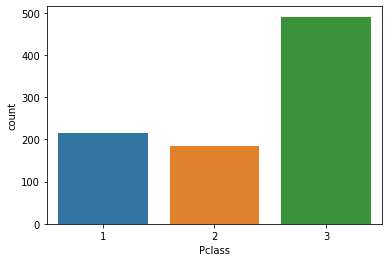

In [11]:
sns.countplot(x='Pclass',data = df)

#### Observation: More than 55% passengers belong to class 3, 24% belong to class  2 and 20.6% of them belong to class 2

3. Survived (Target Variable)

In [12]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
df['Survived'].value_counts()/len(df)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

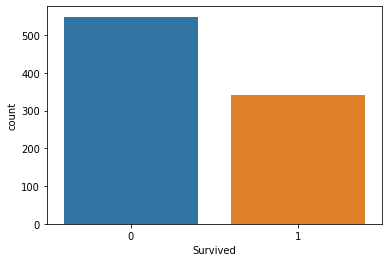

In [14]:
sns.countplot(x='Survived',data = df)

#### Observation: Only 38% passengers could survive 

4. Name

In [15]:
df['Name'].value_counts()

Foo, Mr. Choong                                  1
Arnold-Franchi, Mrs. Josef (Josefine Franchi)    1
Hart, Mr. Henry                                  1
Sage, Miss. Stella Anna                          1
Marvin, Mr. Daniel Warner                        1
                                                ..
Crease, Mr. Ernest James                         1
Tikkanen, Mr. Juho                               1
Sage, Master. Thomas Henry                       1
Nilsson, Miss. Helmina Josefina                  1
Vander Planke, Mr. Leo Edmondus                  1
Name: Name, Length: 891, dtype: int64

In [16]:
len(df['Name'].unique())

891

#### Observation: Name contains all the unique values

5. Sex

In [17]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
df['Sex'].value_counts()/len(df)*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

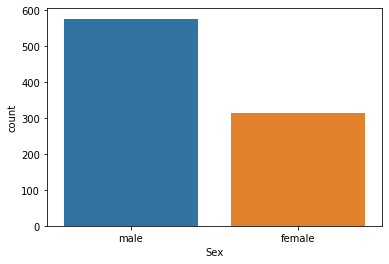

In [19]:
sns.countplot(x='Sex',data = df)

#### Observation: There were 65% males and 35% females on the ship

6. Age

In [20]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [21]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

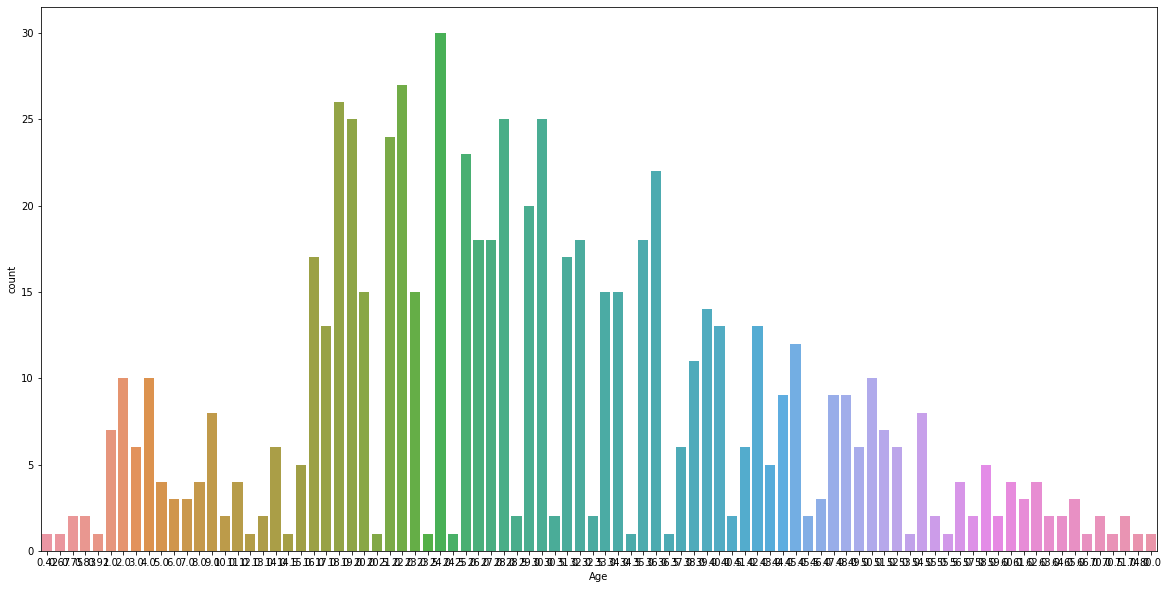

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age',data = df)

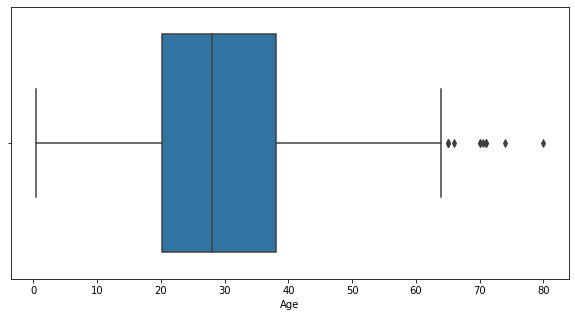

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(y="Age",data=df, orient="h")


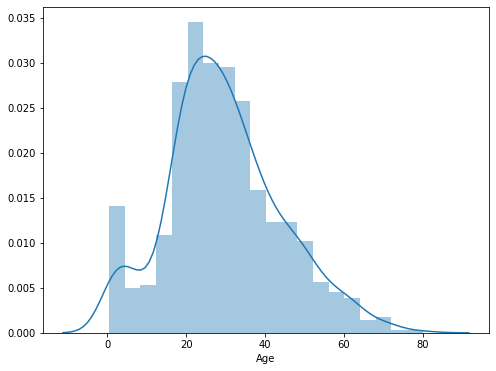

In [25]:
plt.figure(figsize = (8,6))
sns.distplot(df['Age'])

#### Observation: Age of the passegers vary from 0.4 to 80 years, mean age is 29.

#### Observation:

7. SibSp

In [26]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [27]:
df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

#### Observation: More than 50% people on the ship have 0 Sibling and Spouse the maximum number of SibSp is 5.


 8. Parch

In [28]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

#### Observation: More than 50% of the passengers have no (0) parents and children on the ship.

9. Fare

In [29]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [30]:
df['Fare'].max()

512.3292

In [31]:
df['Fare'].min()

0.0

10. Embarked

In [32]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [33]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Task 1: Analysis

1. Number of Males/Females on the ship

In [34]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

#### Observation: There were 557 male and 314 female passangers on the ship

2. Ratio of Females as compared to male when it comes to survival

In [35]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [36]:
survived=df[df['Survived']==1]

In [37]:
survived['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [38]:
survived['Sex'].value_counts()/len(survived)*100

female    68.128655
male      31.871345
Name: Sex, dtype: float64

#### Observation: The percentage of Females and Males in the survived data is 68% and 31% respectively 

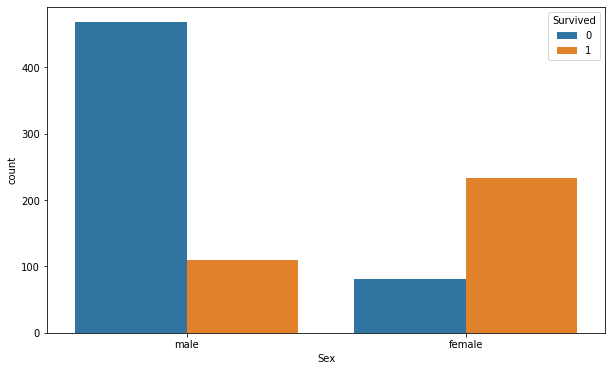

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex',hue = 'Survived',data=df)

In [40]:
df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

In [59]:
Sexcrosstab = pd.crosstab(df['Sex'],df['Survived'])
Sexcrosstab

Survived    0    1
Sex               
female     81  233
male      468  109

In [68]:
testStatistic, pVal, dof, contigencyTab = chi2_contingency(Sexcrosstab)

In [69]:
print('Test Statistics', testStatistic, 'P-Value',pVal, 'contigencyTab', contigencyTab)

Test Statistics 260.71702016732104 P-Value 1.1973570627755645e-58 contigencyTab [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


#### Observation: It can be seen from the above graph that percentage of male passengers present on the ship was higher as compared to female but the percentage of females is much higher than male when it comes to survival

3. Percentage of Survivors/non-survivors on the ship   

In [41]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [42]:
df['Survived'].value_counts()/len(df)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

#### Observation: Only 38% of the passangers could survive

4. How many teeangers were on the ship?

In [43]:
(df['Age']<=19).value_counts()

False    727
True     164
Name: Age, dtype: int64

#### Observation: There were 164 teenagers o the ship

### Bi-Variate Analysis

Age with survival

In [44]:
# Making Age buckets
df['AGE_BUCKETS'] = np.where((df['Age']> 0) & (df['Age'] <13) ,'kids',
                    np.where((df['Age'] >=13) & (df['Age']<20),'teenager',
                    np.where((df['Age'] >=20) & (df['Age']<31),'Adult',
                    np.where((df['Age'] >=31) & (df['Age']<51),'Middle age', 'Old'))))

In [45]:
df['AGE_BUCKETS'].value_counts()

Adult         247
Old           241
Middle age    239
teenager       95
kids           69
Name: AGE_BUCKETS, dtype: int64

Text(0, 0.5, 'Count of Passengers')

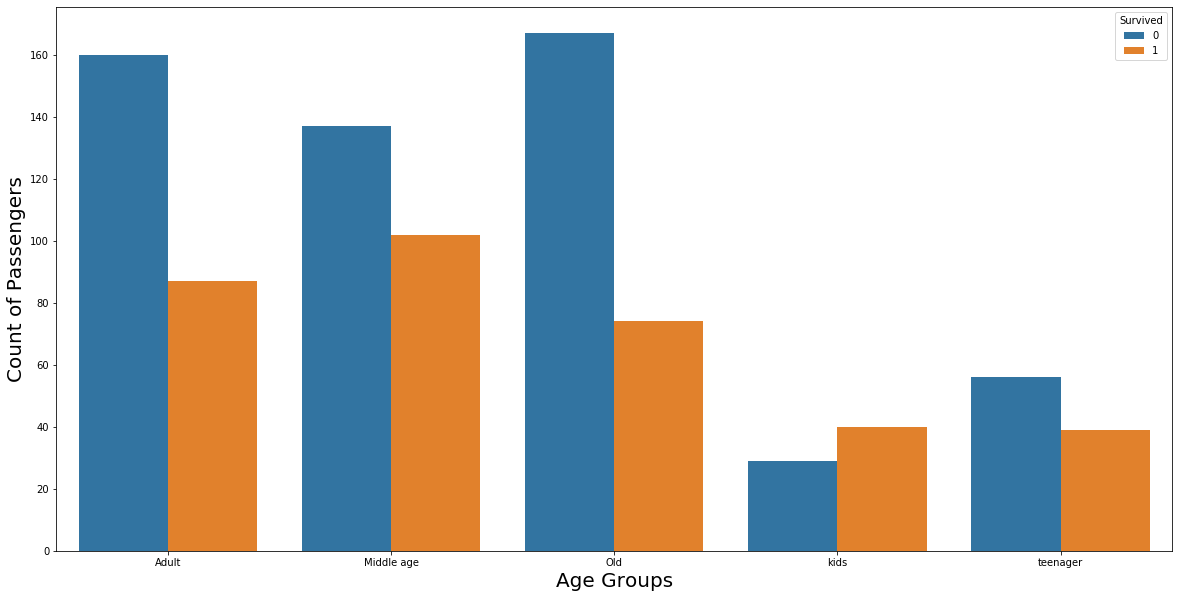

In [46]:
plt.figure(figsize=(20,10))
sns.countplot(x='AGE_BUCKETS',hue = 'Survived',data=df)
plt.xlabel('Age Groups',size=20)
plt.ylabel('Count of Passengers',size = 20)

Pclass with Survived

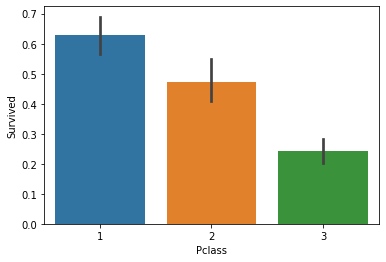

In [47]:
sns.barplot(x='Pclass', y='Survived', data=df)

In [54]:
pcsurvive = pd.crosstab(df['Pclass'],df['Survived'])
pcsurvive

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

In [66]:
testStatistic, pVal, dof, contigencyTab = chi2_contingency(pcsurvive)

In [67]:
print('Test Statistics', testStatistic, 'P-Value',pVal, 'contigencyTab', contigencyTab)

Test Statistics 102.88898875696056 P-Value 4.549251711298793e-23 contigencyTab [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


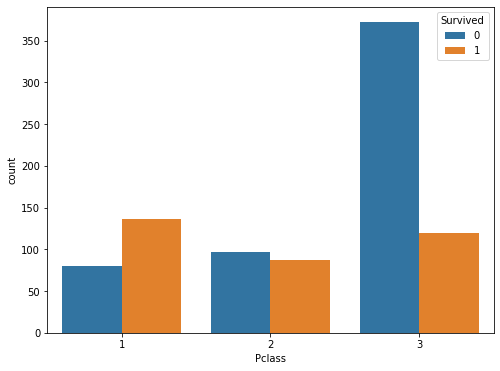

In [48]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'Pclass',hue = 'Survived', data = df)

In [49]:
group_survived = df.groupby(['Pclass'])
out_survived = group_survived['Survived'].sum()
print(out_survived)

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


#### Observation: Pclass 1 has the highest ratio in the survival 

Fare with Survival

In [50]:
df['Fare'] = pd.qcut(df['Fare'], 15)

Text(0, 0.5, 'Passenger Count')

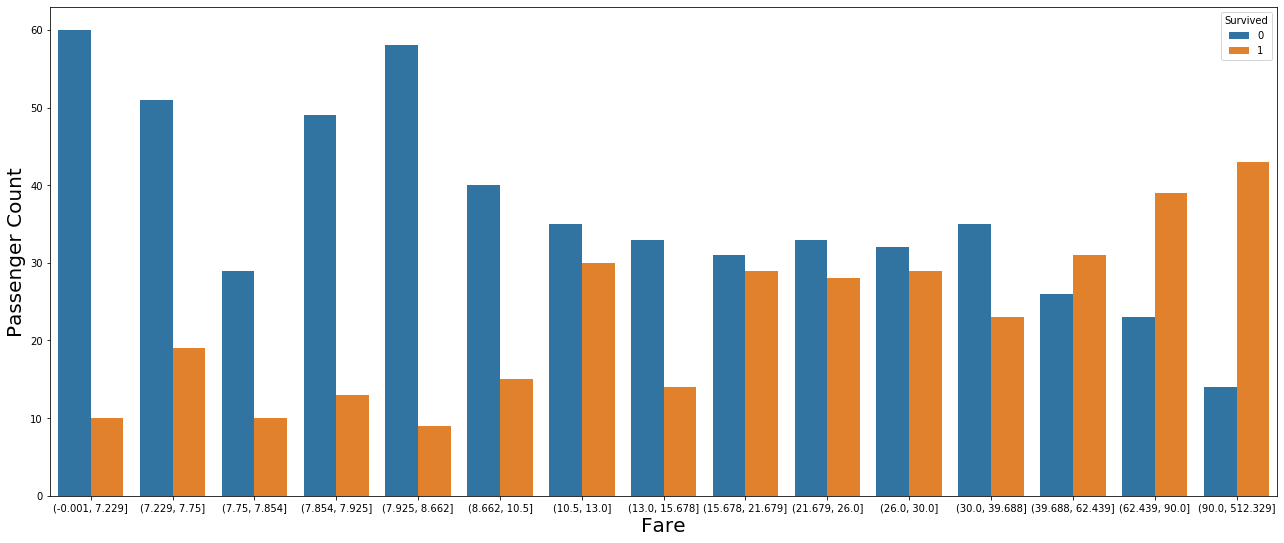

In [51]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df)
plt.xlabel('Fare',size=20)
plt.ylabel('Passenger Count',size=20)

In [52]:
df['Fare'].min()

Interval(-0.001, 7.229, closed='right')

#### Observation: It can be seen from the graph that number of survival increases with the increase in fair

Fair and pclass

Text(0, 0.5, 'Passenger Count')

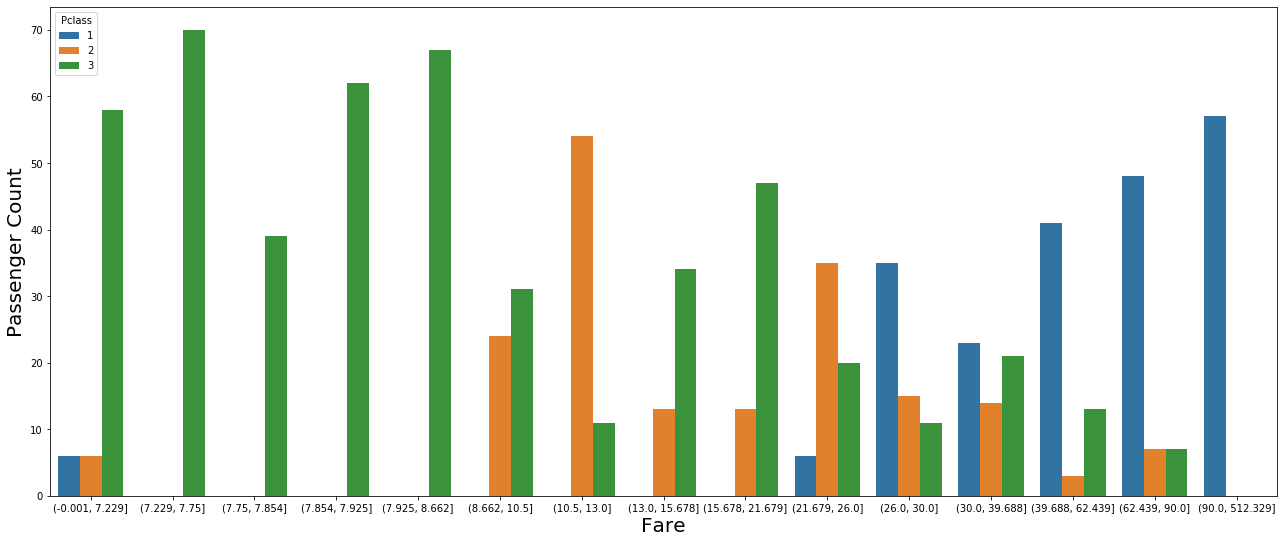

In [52]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Pclass', data=df)
plt.xlabel('Fare',size=20)
plt.ylabel('Passenger Count',size=20)

Embarked with Pclass

Text(0, 0.5, 'Passenger Count')

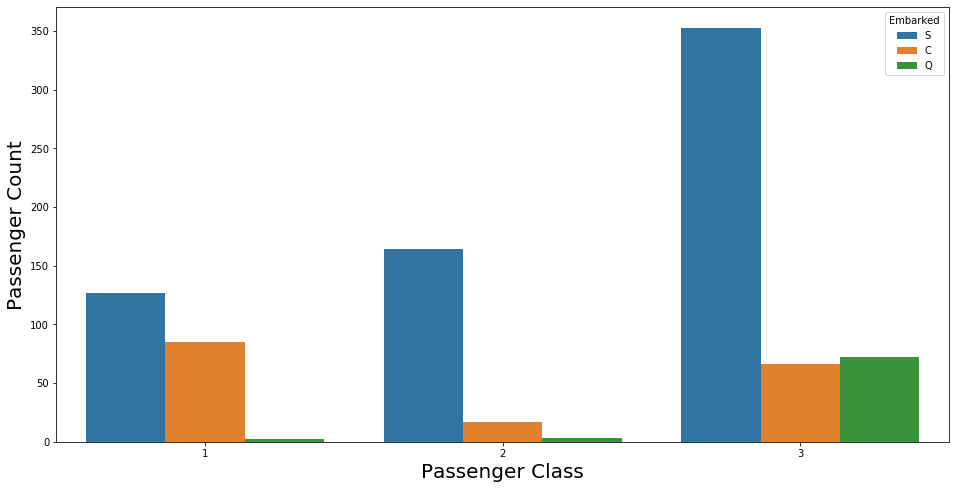

In [53]:
fig, axs = plt.subplots(figsize=(16,8))
sns.countplot(x='Pclass', hue='Embarked', data=df)
plt.xlabel('Passenger Class',size=20)
plt.ylabel('Passenger Count',size=20)

#### Observation: 

SibSp with Survived

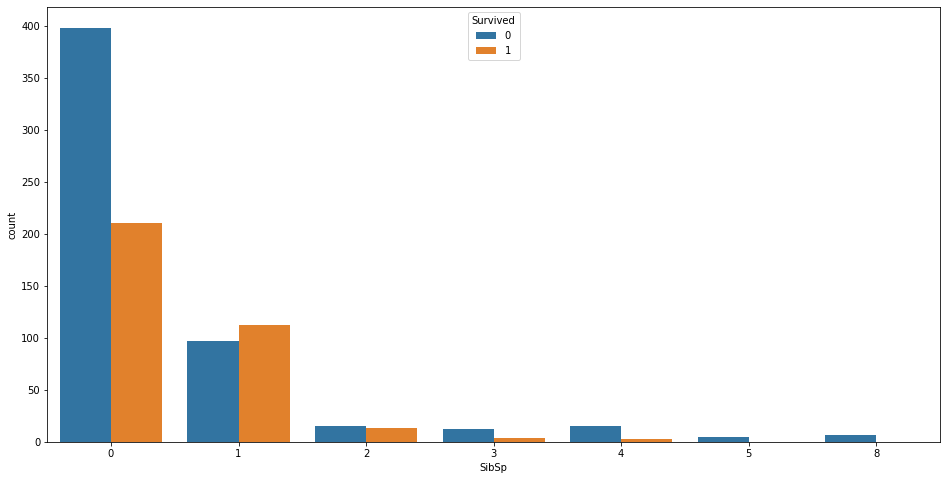

In [54]:
fig, axs = plt.subplots(figsize=(16,8))
sns.countplot(x='SibSp', hue='Survived', data=df)

In [55]:
group_survived = df.groupby(['SibSp'])
out_survived = group_survived['Survived'].sum()
print(out_survived)

SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64


In [56]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

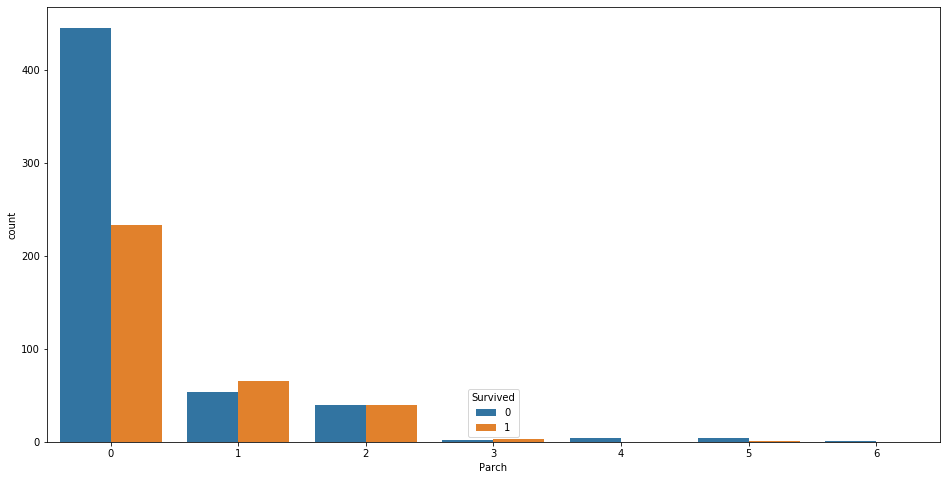

In [57]:
fig, axs = plt.subplots(figsize=(16,8))
sns.countplot(x='Parch', hue='Survived', data=df)

In [60]:
group_survived = df.groupby(['Parch'])
out_survived = group_survived['Survived'].sum()
print(out_survived)

Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64


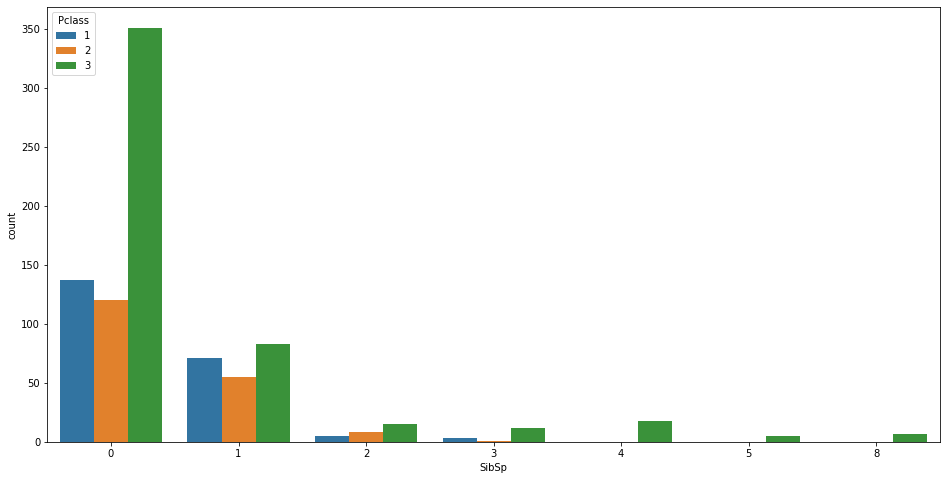

In [61]:
fig, axs = plt.subplots(figsize=(16,8))
sns.countplot(x='SibSp', hue='Pclass', data=df)

In [146]:
# Add family size feature
df['Family Size'] = df['SibSp'] + df['Parch'] + 1
df.groupby('Family Size').mean()

Survived    Pclass       Sex        Age     SibSp     Parch  \
Family Size                                                                
1            0.303538  2.400372  0.234637  31.223464  0.000000  0.000000   
2            0.552795  1.919255  0.540373  31.257267  0.763975  0.236025   
3            0.578431  2.225490  0.480392  26.140490  0.872549  1.127451   
4            0.724138  2.068966  0.655172  18.531724  1.344828  1.655172   
5            0.200000  2.666667  0.800000  23.000000  2.133333  1.866667   
6            0.136364  2.590909  0.363636  18.409091  2.818182  2.181818   
7            0.333333  3.000000  0.666667  15.166667  3.250000  2.750000   
8            0.000000  3.000000  0.333333  15.666667  4.333333  2.666667   
11           0.000000  3.000000  0.428571  30.571429  8.000000  2.000000   

             Embarked  
Family Size            
1            0.370577  
2            0.428571  
3            0.343137  
4            0.241379  
5            0.133333  
6            0.454545  
7            0.000000  
8            0.000000  
11           0.000000

### Task2 

### 1. Data Cleaning

In [62]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AGE_BUCKETS      0
dtype: int64

#### Observation: There are 177 records where age is missing, 687 records where cabin is missing, 2 records of Embarked are missing

#### Dealing with the missing values

In [148]:
#More than 75% records are missing in Cabin so we should remove this column
df = df.drop(['Cabin'], axis=1)

In [143]:
# Age will be contributing inthe prediction so we should fill the null values with the existing values in the distribution
mean = df["Age"].mean()
std = df["Age"].std()
# we will randomly generate ages in the standard width
random_ages = [random.randrange(int(mean - std), int(mean + std)) for _ in range(df["Age"].isna().sum())]
# replace the null with a random age 1 at a time
for age in random_ages:
    df["Age"].fillna(age, inplace = True, limit=1)

In [149]:
# Embarked contains only 2 null values so we can fill them with the top value
df["Embarked"].fillna(df["Embarked"].describe().top, inplace = True)

In [150]:
# Converting remaining columns to int
sex_mapper = {val:i for i,val in enumerate(df.Sex.unique())}
df["Sex"] = df["Sex"].map(sex_mapper)

embarked_mapper = {val:i for i,val in enumerate(df.Embarked.unique())}
df["Embarked"] = df["Embarked"].map(embarked_mapper)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [151]:
# PassengerId contains all the unique values, it will not be contributing so we are dropping it
df = df.drop(['PassengerId'], axis=1)

In [152]:
len(df['Name'].unique())

891

In [153]:
# Name contains all the unique values, it will not be contributing so we are dropping it
df = df.drop(['Name'], axis=1)

In [154]:
len(df['Ticket'].unique())

681

In [155]:
df=df.drop(['Ticket'],axis=1)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [ ]:
df=df.drop(['Fare'],axis=1)

In [129]:
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch  Embarked
0         0       3    0  22.0      1      0         0
1         1       1    1  38.0      1      0         1
2         1       3    1  26.0      0      0         0
3         1       1    1  35.0      1      0         0
4         0       3    0  35.0      0      0         0

### Correlation:

### Data Modeling

### Spliting Data

In [133]:
# Data Modelling
train, test = train_test_split(df, test_size=0.3)
X_test = test.drop("Survived", axis=1)
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
Y_test= np.array(test["Survived"])

### Using Random Forest

In [134]:
RF = RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=500, random_state=5,criterion = 'entropy')
RF = RF.fit(X_train,Y_train)
Y_pred = RF.predict(X_test)
acc_forest = round(RF.score(X_train, Y_train) *100 , 2)
acc_forest

83.95

### Using Decision Tree Classifier

In [135]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
acc_tree = round(tree.score(X_train, Y_train)*100, 2)
acc_tree

94.06

### Using Naive Bayes

In [136]:
NB = GaussianNB()
NB.fit(X_train, Y_train)
Y_pred = NB.predict(X_test)
acc_NB = round(NB.score(X_train, Y_train)*100, 2)
acc_NB

79.13

### Comparing Accuracy, Recall and Precision 

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models_mapper = {RandomForestClassifier: "Random Forest", DecisionTreeClassifier: "Decision Tree",GaussianNB: 'Naive Bayes'}

results = dict()
for model,model_name in models_mapper.items():
    mod = model()
    mod.fit(X_train, Y_train)

    Y_predicted = mod.predict(X_test)
    results[model_name] = {
    "Accuracy":accuracy_score(Y_test, Y_predicted),
    "Recall":recall_score(Y_test, Y_predicted),
    "Precision": precision_score(Y_test, Y_predicted, average='macro')}

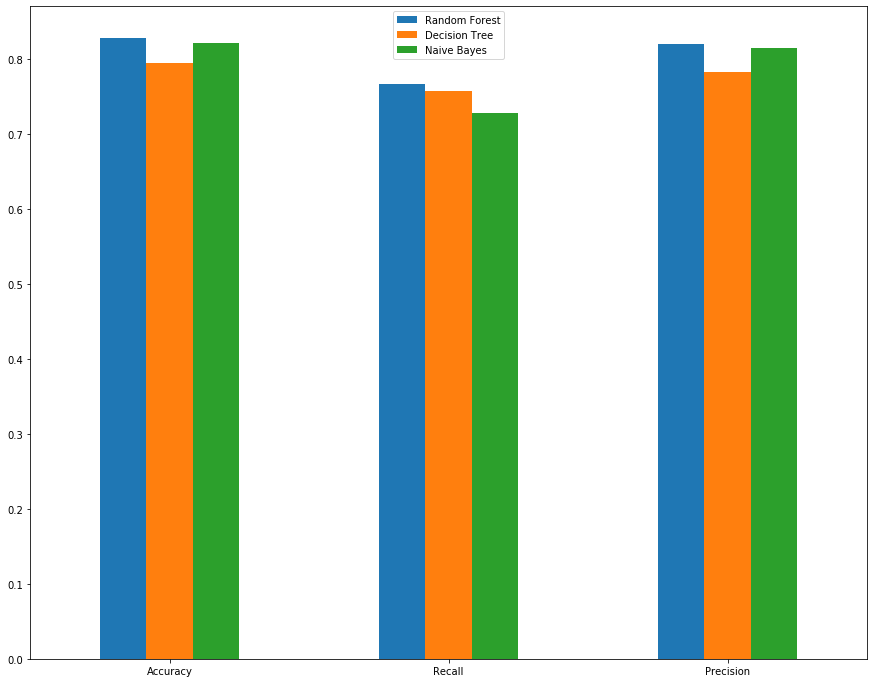

In [106]:
# Presentation
results = pd.DataFrame(results)
results.plot(kind='bar', figsize=(15,12),rot=0)

In [97]:
from sklearn.metrics import confusion_matrix

In [141]:
from scipy import stats

chi2_stat, p_val, dof, ex = stats.chi2_contingency(df)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
9400.439941447152


===Degrees of Freedom===
5340


===P-Value===
1.156822041613672e-228


===Contingency Table===
[[0.29557073 1.77774557 0.27137195 ... 0.40273672 0.29384224 0.27828589]
 [0.48882851 2.94011768 0.44880746 ... 0.66606458 0.48596986 0.46024205]
 [0.35241125 2.11961972 0.32355887 ... 0.48018609 0.35035037 0.33180241]
 ...
 [0.34104315 2.05124489 0.31312149 ... 0.46469622 0.33904874 0.3210991 ]
 [0.32967504 1.98287006 0.3026841  ... 0.44920634 0.32774712 0.3103958 ]
 [0.42061988 2.5298687  0.38618317 ... 0.57312533 0.41816012 0.39602223]]
